In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from scipy.stats import norm

In [0]:
for dirname, _, filenames in os.walk(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest2.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt


In [0]:
#df= pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt')
df_test_1 = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest.txt',  header=0, parse_dates=True, squeeze=True)

In [0]:
df_test_1.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [0]:
df_test_1.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [0]:
df_test_1.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [0]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [0]:
df_test_1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [0]:
df_test_1.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

**TEMPERATURE**

Text(0.5, 1.0, 'Temperature')

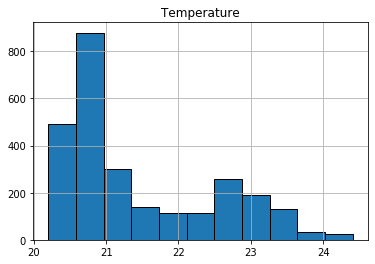

In [0]:
df_test_1['Temperature'].hist(bins=11, edgecolor='black')
plt.title('Temperature')
plt.show()

In [0]:
Temperature = df_test_1['Temperature'].copy()
Temperature.describe()

count    2665.000000
mean       21.433876
std         1.028024
min        20.200000
25%        20.650000
50%        20.890000
75%        22.356667
max        24.408333
Name: Temperature, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_1['Temperature']//0.5*0.5, df_test_1['Occupancy'])
x_default

Occupancy,0,1
Temperature,,
20.0,270,18
20.5,972,116
21.0,246,76
21.5,96,83
22.0,60,98
22.5,21,299
23.0,28,191
23.5,0,67
24.0,0,24


Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

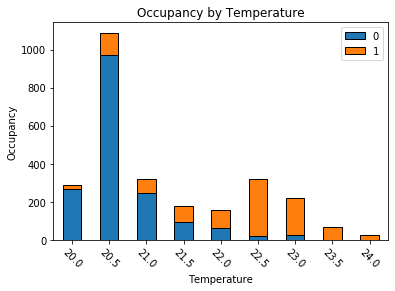

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Temperature', edgecolor='black')
pclass_xt = pd.crosstab(df_test_1['Temperature'], df_test_1['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Temperature')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY**

Text(0.5, 1.0, 'Humidity')

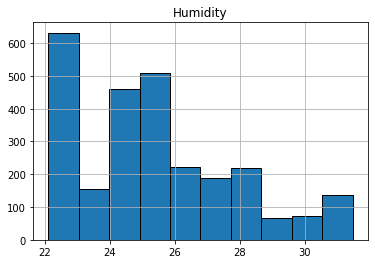

In [0]:
df_test_1['Humidity'].hist(bins=10, edgecolor='black')
plt.title('Humidity')
plt.show()

In [0]:
Humidity = df_test_1['Humidity'].copy()
Humidity.describe()

count    2665.000000
mean       25.353937
std         2.436842
min        22.100000
25%        23.260000
50%        25.000000
75%        26.856667
max        31.472500
Name: Humidity, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_1['Humidity']//1*1, df_test_1['Occupancy'])
x_default

Occupancy,0,1
Humidity,,
22.0,623,3
23.0,142,21
24.0,428,105
25.0,274,201
26.0,79,139
27.0,65,156
28.0,44,144
29.0,26,24
30.0,12,111


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

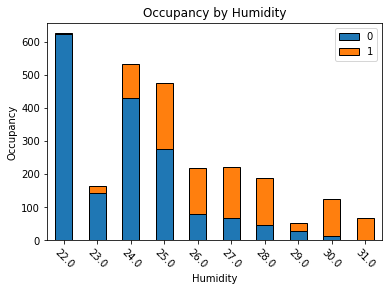

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Humidity', edgecolor='black')
pclass_xt = pd.crosstab(df_test_1['Humidity'], df_test_1['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
x_default_norm = x_default.div(x_default.sum(1).astype(float), axis=0)
x_default_norm

Occupancy,0,1
Humidity,,
22.0,0.995208,0.004792
23.0,0.871166,0.128834
24.0,0.803002,0.196998
25.0,0.576842,0.423158
26.0,0.362385,0.637615
27.0,0.294118,0.705882
28.0,0.234043,0.765957
29.0,0.520000,0.480000
30.0,0.097561,0.902439


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

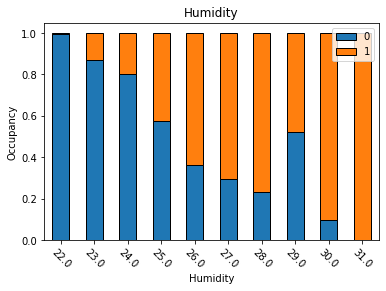

In [0]:
x_default_norm.plot(kind='bar', stacked=True, title='Humidity', edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**LIGHT**

Text(0.5, 1.0, 'Light')

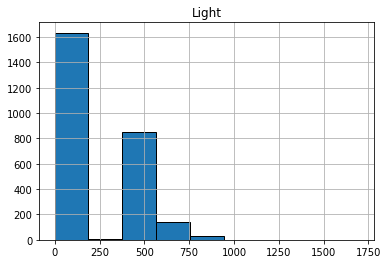

In [0]:
df_test_1['Light'].hist(bins=9, edgecolor='black')
plt.title('Light')
plt.show()

In [0]:
Light = df_test_1['Light'].copy()
Light.describe()

count    2665.000000
mean      193.227556
std       250.210906
min         0.000000
25%         0.000000
50%         0.000000
75%       442.500000
max      1697.250000
Name: Light, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_1['Light']//150*150, df_test_1['Occupancy'])
x_default

Occupancy,0,1
Light,,
0.0,1616,0
150.0,22,1
300.0,41,399
450.0,7,441
600.0,7,96
750.0,0,32
1200.0,0,1
1350.0,0,1
1650.0,0,1


Text(0.5, 0, 'Light')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

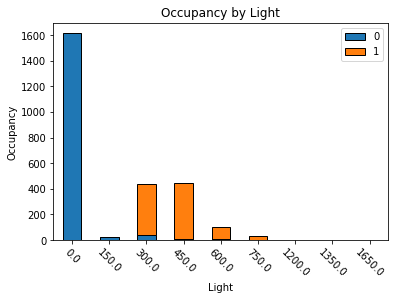

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Light', edgecolor='black')
pclass_xt = pd.crosstab(df_test_1['Light'], df_test_1['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Light')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**CO2**

Text(0.5, 1.0, 'CO2')

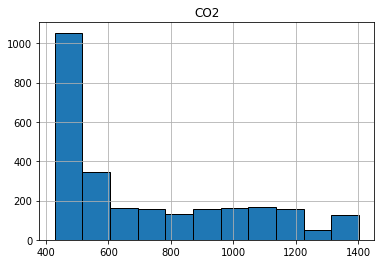

In [0]:
df_test_1['CO2'].hist(bins=11, edgecolor='black')
plt.title('CO2')
plt.show()

In [0]:
CO2 = df_test_1['CO2'].copy()
CO2.describe()

count    2665.000000
mean      717.906470
std       292.681718
min       427.500000
25%       466.000000
50%       580.500000
75%       956.333333
max      1402.250000
Name: CO2, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_1['CO2']//100*100, df_test_1['Occupancy'])
x_default

Occupancy,0,1
CO2,,
400.0,979,19
500.0,344,40
600.0,133,56
700.0,87,73
800.0,59,107
900.0,51,122
1000.0,20,183
1100.0,18,167
1200.0,2,70


Text(0.5, 0, 'CO2')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

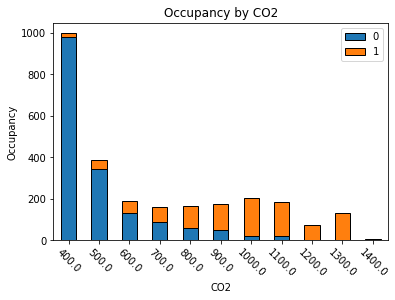

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by CO2', edgecolor='black')
pclass_xt = pd.crosstab(df_test_1['CO2'], df_test_1['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('CO2')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY RATIO**

Text(0.5, 1.0, 'HumidityRatio')

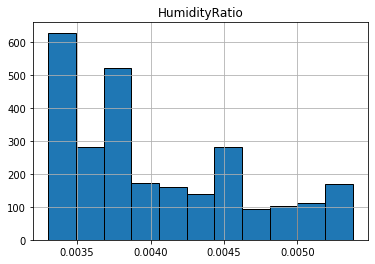

In [0]:
df_test_1['HumidityRatio'].hist(bins=11, edgecolor='black')
plt.title('HumidityRatio')
plt.show()

In [0]:
HumidityRatio = df_test_1['HumidityRatio'].copy()
HumidityRatio.describe()

count    2665.000000
mean        0.004027
std         0.000611
min         0.003303
25%         0.003529
50%         0.003815
75%         0.004532
max         0.005378
Name: HumidityRatio, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_1['HumidityRatio']//0.0002*0.0002, df_test_1['Occupancy'])
x_default

Occupancy,0,1
HumidityRatio,,
0.0032,554,3
0.0034,174,27
0.0036,468,74
0.0038,200,68
0.0040,109,38
0.0042,72,106
0.0044,66,194
0.0046,24,95
0.0048,15,97


Text(0.5, 0, 'HumidityRatio')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

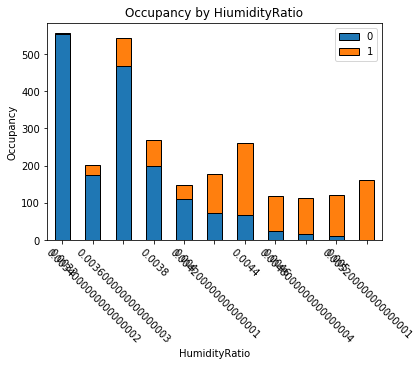

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by HiumidityRatio', edgecolor='black')
pclass_xt = pd.crosstab(df_test_1['HumidityRatio'], df_test_1['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('HumidityRatio')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**OCCUPANCY**

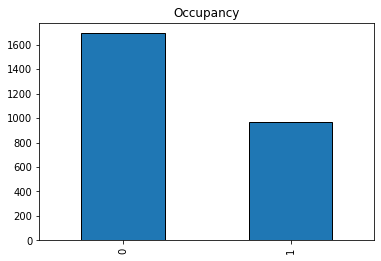

In [0]:
df_test_1['Occupancy'].value_counts().plot(kind='bar', title='Occupancy', edgecolor='black')
plt.show();

 **Project Task 1 - Basic Classifiers and Evaluation**

1. Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.


2. Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.


3. Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.


4. Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.


5. Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).


6. Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.


7. Draw your conclusions about the basic classifiers and techniques adopted in this analysis.

**COVARIANCE and CORRELATION**

In [0]:
df_test_1.cov()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.056834,1.796151,197.657215,261.837119,5.614931e-04,0.349318
Humidity,1.796151,5.938201,342.607136,650.178170,1.416323e-03,0.716550
Light,197.657215,342.607136,62605.497367,56327.793073,1.059146e-01,111.783129
CO2,261.837119,650.178170,56327.793073,85662.588282,1.723488e-01,108.222974
HumidityRatio,0.000561,0.001416,0.105915,0.172349,3.727990e-07,0.000206
Occupancy,0.349318,0.716550,111.783129,108.222974,2.058667e-04,0.231788


In [0]:
df_corr = df_test_1.copy()

In [0]:
df_corr.corr(method='pearson')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


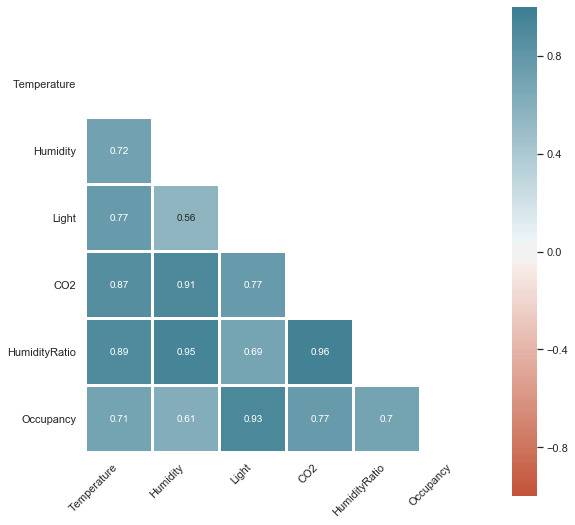

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='pearson')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [0]:
df_corr.corr(method='spearman')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.813656,0.724969,0.927682,0.919091,0.656512
Humidity,0.813656,1.000000,0.630356,0.924486,0.965231,0.621016
Light,0.724969,0.630356,1.000000,0.762161,0.705393,0.927326
CO2,0.927682,0.924486,0.762161,1.000000,0.968245,0.737285
HumidityRatio,0.919091,0.965231,0.705393,0.968245,1.000000,0.675352
Occupancy,0.656512,0.621016,0.927326,0.737285,0.675352,1.000000


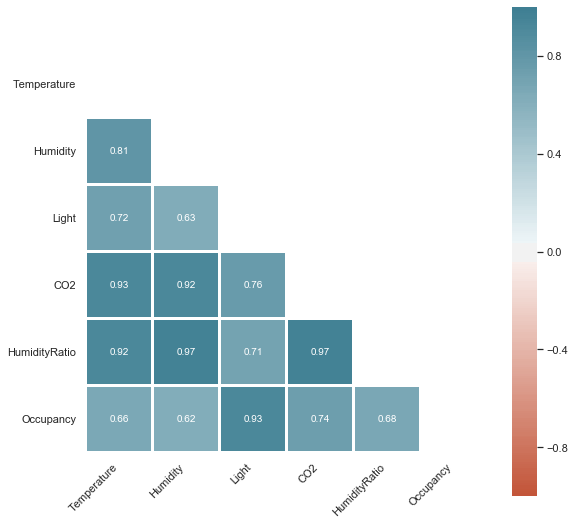

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='spearman')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');